In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

from torchvision import datasets

from torch.utils import tensorboard

In [3]:
writer = tensorboard.SummaryWriter('runs/experiment_1')

In [4]:
gender_df = pd.read_csv("gender_submission.csv")

In [5]:
gender_df.head(10)

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0

In [6]:
gender_test_df = pd.read_csv("test.csv")

In [7]:
gender_train_df = pd.read_csv("train.csv")
gender_train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [8]:
gender_train_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1) 

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0              1         0       3    male  22.0      1      0   7.2500
1              2         1       1  female  38.0      1      0  71.2833
2              3         1       3  female  26.0      0      0   7.9250
3              4         1       1  female  35.0      1      0  53.1000
4              5         0       3    male  35.0      0      0   8.0500
..           ...       ...     ...     ...   ...    ...    ...      ...
886          887         0       2    male  27.0      0      0  13.0000
887          888         1       1  female  19.0      0      0  30.0000
888          889         0       3  female   NaN      1      2  23.4500
889          890         1       1    male  26.0      0      0  30.0000
890          891         0       3    male  32.0      0      0   7.7500

[891 rows x 8 columns]

In [9]:
#we delete the columns we're not going to use to keep as many values as possible without 'NaN'.

In [10]:
gender_train_df.dropna(inplace=True) #for deleting the 'NaN' values

In [11]:
gender_test_df.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [12]:
gender_train_df.head(10)
gender_train_df.shape

(183, 12)

In [13]:
gender_train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200

In [14]:
#Preparing the datas ; keep : Pclass, Sex, Age, SibSp, Parch, Fare, 

In [15]:
gender_train_df['Sex']= gender_train_df['Sex'].map({'female': 0, 'male': 1}) #in binary for the Logistic Regression

In [16]:
gender_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
X = gender_train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']] #keeping the interesting categories
y = gender_train_df['Survived']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
X_train.shape

(146, 6)

In [20]:
X_test.shape

(37, 6)

In [21]:
y_train.shape

(146,)

In [22]:
y_test.shape

(37,)

In [23]:
#Creating the model :

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test) #predict the survival on the whole test
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
#Evaluating the model :

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("The model is {} precise".format(accuracy))

The model is 0.7297297297297297 precise


In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [30]:
confusion_df = pd.DataFrame(conf_matrix, index=["Not Survived", "Survived"], columns=["Not Survived", "Survived"])
print(confusion_df)

              Not Survived  Survived
Not Survived             8         6
Survived                 4        19


In [31]:
rep=classification_report(y_test,y_pred)

In [32]:
print(rep)

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.76      0.83      0.79        23

    accuracy                           0.73        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37



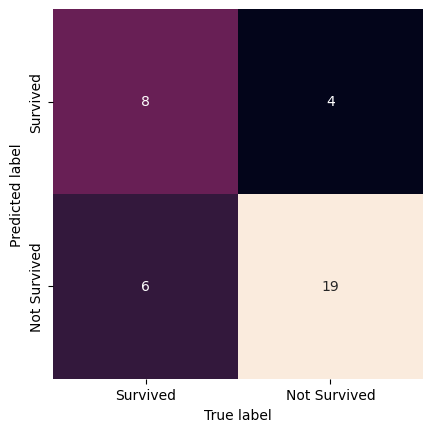

In [33]:
xticklabels = ["Survived", "Not Survived"]
yticklabels = ["Survived", "Not Survived"]

sns.heatmap(conf_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=xticklabels,
            yticklabels=yticklabels)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()
writer.add_figure("Conf_matrix", plt.gcf())


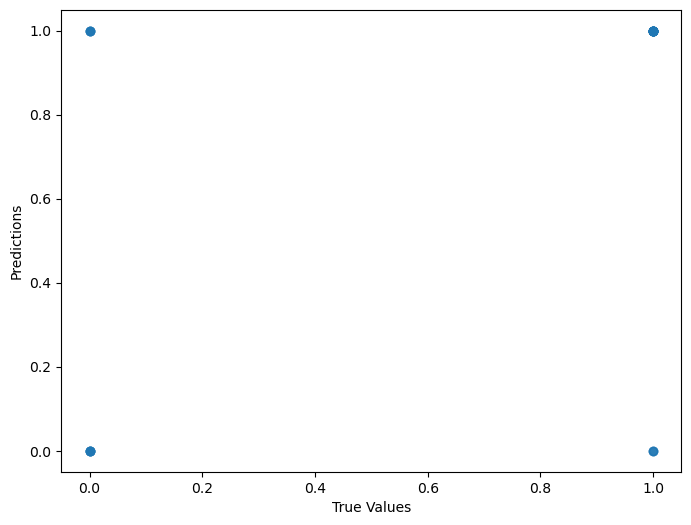

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
writer.add_figure("Plot 1", plt.gcf())

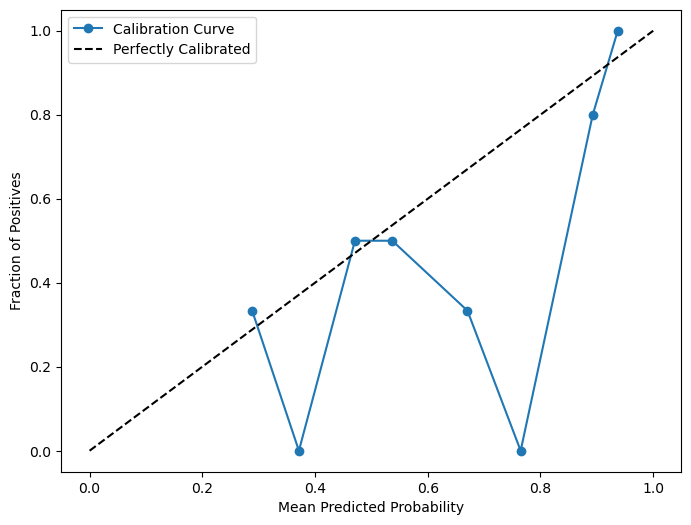

In [35]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, model.predict_proba(X_test)[:, 1], n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()
writer.add_figure("Calibration Curve", plt.gcf())

In [36]:
#Without deleting the 'NaN' values but with remplacing theses values with the mean 

In [37]:
gender_train_1 = pd.read_csv("train.csv")

In [38]:
gender_train_1.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1) 

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0              1         0       3    male  22.0      1      0   7.2500
1              2         1       1  female  38.0      1      0  71.2833
2              3         1       3  female  26.0      0      0   7.9250
3              4         1       1  female  35.0      1      0  53.1000
4              5         0       3    male  35.0      0      0   8.0500
..           ...       ...     ...     ...   ...    ...    ...      ...
886          887         0       2    male  27.0      0      0  13.0000
887          888         1       1  female  19.0      0      0  30.0000
888          889         0       3  female   NaN      1      2  23.4500
889          890         1       1    male  26.0      0      0  30.0000
890          891         0       3    male  32.0      0      0   7.7500

[891 rows x 8 columns]

In [39]:
gender_train_1['Sex']= gender_train_df['Sex'].map({'female': 0, 'male': 1}) #in binary for the Logistic Regression

In [40]:
mean_age = gender_train_1['Age'].mean()
gender_train_1['Age'].fillna(mean_age, inplace=True)

mean_sex = gender_train_1['Age'].mean()
gender_train_1['Sex'].fillna(mean_sex, inplace=True)

mean_1 = gender_train_1['SibSp'].mean()
gender_train_1['SibSp'].fillna(mean_1, inplace=True)

mean_2 = gender_train_1['Parch'].mean()
gender_train_1['Parch'].fillna(mean_2, inplace=True)

mean_3 = gender_train_1['Fare'].mean()
gender_train_1['Fare'].fillna(mean_3, inplace=True)

mean_4 = gender_train_1['Pclass'].mean()
gender_train_1['Pclass'].fillna(mean_4, inplace=True)
gender_train_1.shape

(891, 12)

In [41]:
X1 = gender_train_1[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']] #keeping the interesting categories
y1 = gender_train_1['Survived']

In [42]:
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [43]:
#Creating the model :

In [44]:
model1 = LogisticRegression()

In [45]:
model1.fit(X_train1, y_train1)

LogisticRegression()

In [46]:
y_pred1 = model.predict(X_test1) #predict the survival on the whole test
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [47]:
#Evaluating the model :

In [48]:
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The model is {} precise".format(accuracy1))

The model is 0.5865921787709497 precise


In [49]:
conf_matrix1 = confusion_matrix(y_test1, y_pred1)

In [50]:
confusion_df1 = pd.DataFrame(conf_matrix1, index=["Not Survived", "Survived"], columns=["Not Survived", "Survived"])
print(confusion_df1)

              Not Survived  Survived
Not Survived           105         0
Survived                74         0


In [51]:
rep1=classification_report(y_test1,y_pred1)
print(rep1)

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



/Users/mehdisaadi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mehdisaadi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mehdisaadi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

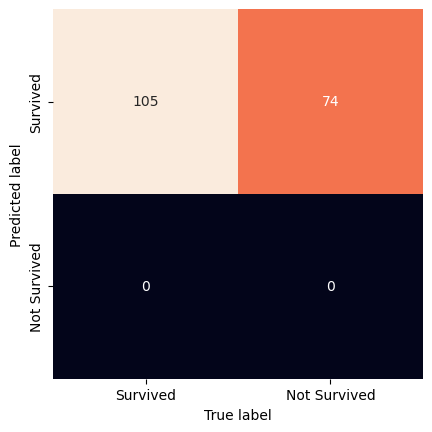

In [52]:
xticklabels1 = ["Survived", "Not Survived"]
yticklabels1 = ["Survived", "Not Survived"]

sns.heatmap(conf_matrix1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=xticklabels1,
            yticklabels=yticklabels1)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()
writer.add_figure("Conf Matrix 2", plt.gcf())

In [53]:
#This model is less efficient than the old one